In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset

df = pd.read_csv('Copper_Set.csv')
df.head(3)


C:\Users\Parthi\AppData\Local\Temp\ipykernel_23916\2162846465.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Copper_Set.csv')


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
# Convert values starting with '00000' in 'Material_Reference' to NaN

# df['material_ref'] = np.where(df['material_ref'].str.startswith('00000'),np.nan,df['material_ref'])


In [5]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [6]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [7]:
# material_ref has large set of null values, so replacing them with NOT SPECIFIED 
df['material_ref'].fillna('not specified', inplace=True)


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [10]:
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [11]:
df.shape

(181631, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181631 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


#### Visualizations on Selling price over item date and delivery date

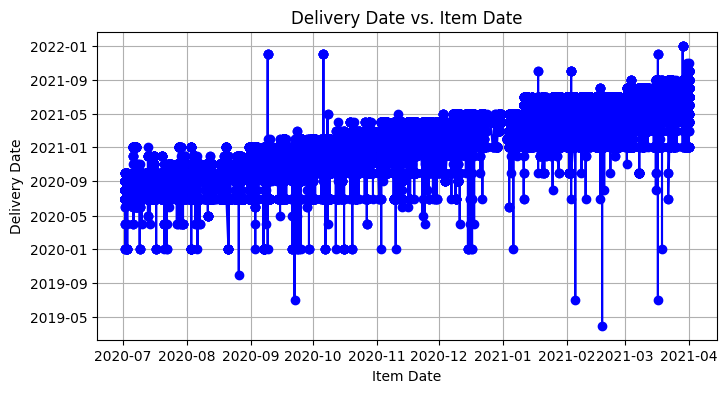

In [22]:
# Convert item_date and delivery date to datetime objects
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

# Plotting delivery date vs item_date
plt.figure(figsize=(8,4))
plt.plot(df['item_date'], df['delivery date'], marker='o', linestyle='-', color='b')
plt.title('Delivery Date vs. Item Date')
plt.xlabel('Item Date')
plt.ylabel('Delivery Date')
plt.grid(True)
plt.show()


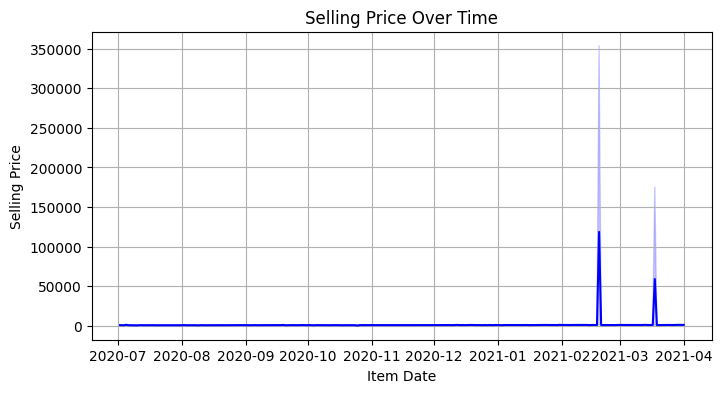

In [23]:
import matplotlib.pyplot as plt

# Plotting selling price over time
plt.figure(figsize=(8, 4))
sns.lineplot(x='item_date', y='selling_price', data=df,color='blue')
plt.title('Selling Price Over Time')
plt.xlabel('Item Date')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()



#### Outliers

In [24]:
# Select only numeric columns

numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define thresholds for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers = (numeric_data < lower_threshold) | (numeric_data > upper_threshold)

# Display columns with outliers
columns_with_outliers = outliers.any()
print("Columns with outliers:")
print(columns_with_outliers[columns_with_outliers])



Columns with outliers:
quantity tons    True
customer         True
application      True
thickness        True
width            True
selling_price    True
dtype: bool


#### Visualization of Outlier columns

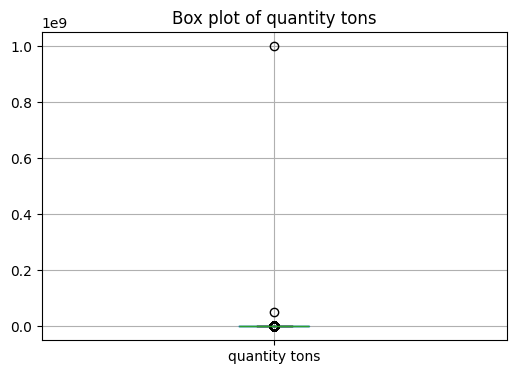

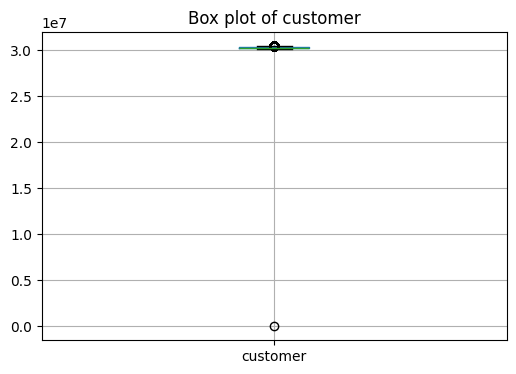

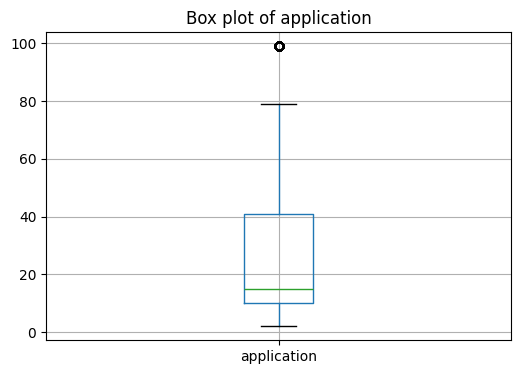

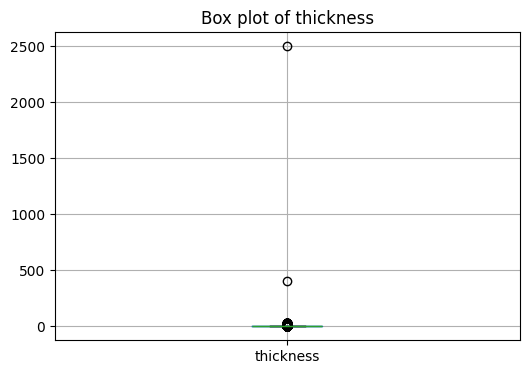

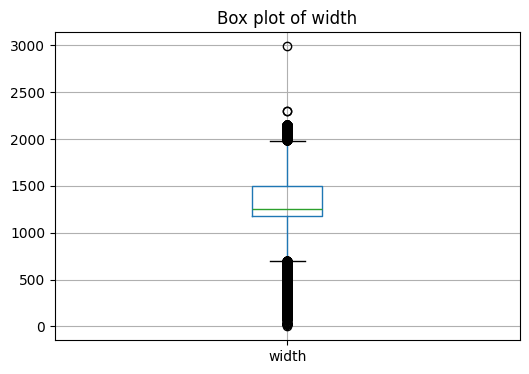

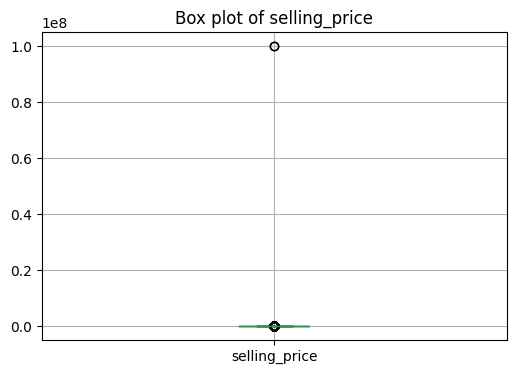

In [25]:
# box plot to show outliers

import matplotlib.pyplot as plt

# Define a function to plot box plots for each column with outliers
def plot_outliers(df, outliers, columns):
    for col in columns:
        if outliers[col]:
            plt.figure(figsize=(6, 4))
            df.boxplot(column=col)
            plt.title(f'Box plot of {col}')
            plt.show()

# Plot box plots for columns with outliers
plot_outliers(numeric_data, columns_with_outliers, columns_with_outliers.index)


#### Skewness

In [26]:
skewness = numeric_data.skew()
print('Skewed columns:')
print(skewness)

Skewed columns:
quantity tons    424.641723
customer        -149.089203
country            0.753584
application        0.724324
thickness        303.471592
width              0.374845
product_ref        1.014983
selling_price    301.353247
dtype: float64


#### Visualizations of Skewed columns

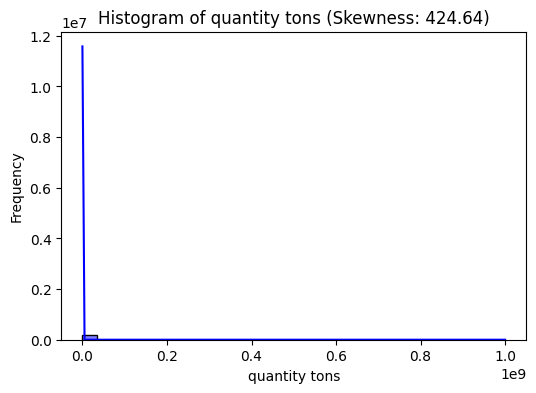

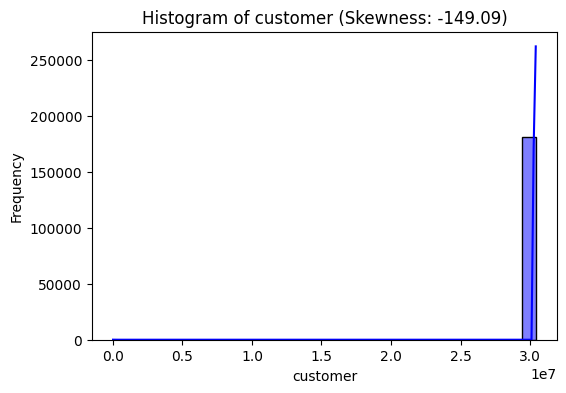

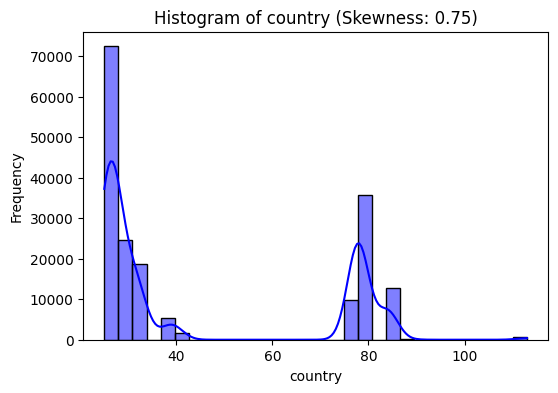

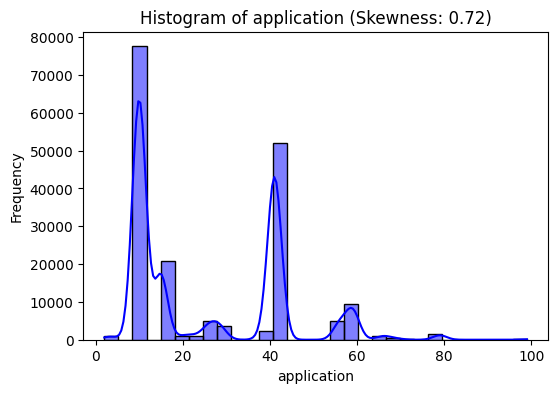

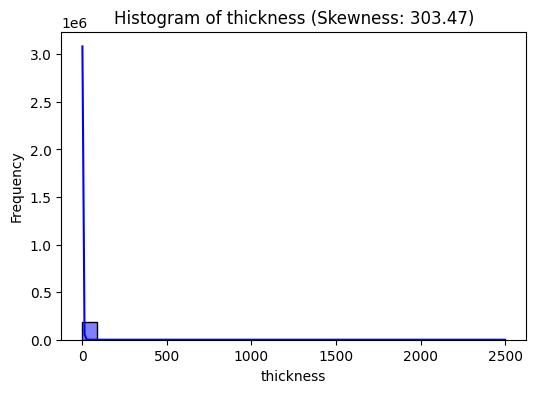

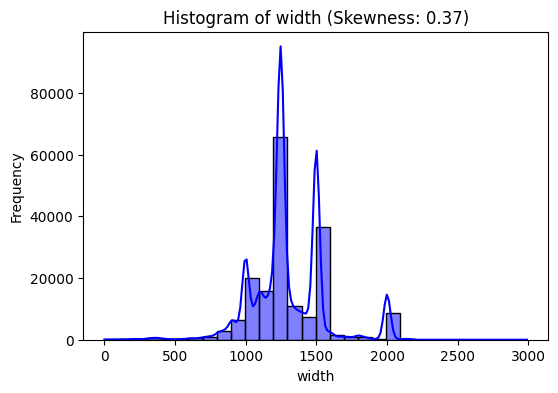

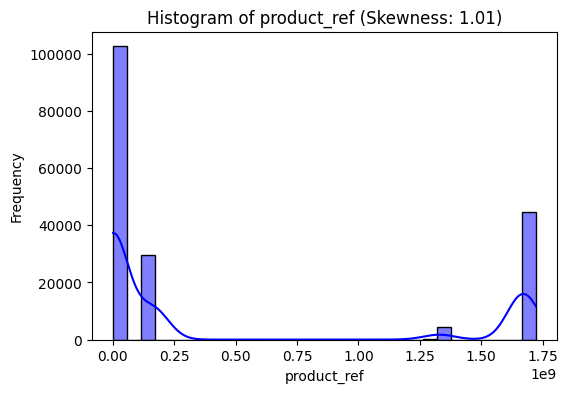

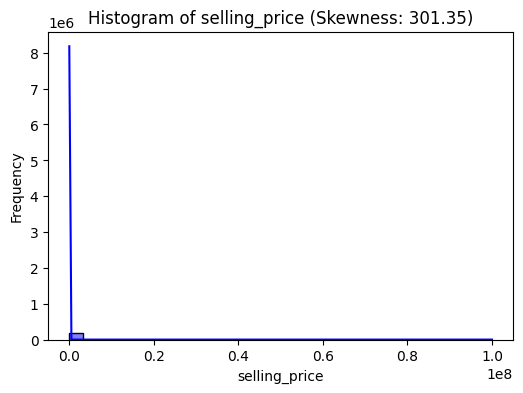

In [27]:
# Select the skewed columns
skewed_columns = ['quantity tons', 'customer','country','application','thickness', 'width','product_ref', 'selling_price']

# Visualize skewness for each skewed column
for col in skewed_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(numeric_data[col],kde=True, color='blue', bins=30)
    plt.title(f'Histogram of {col} (Skewness: {numeric_data[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    

In [28]:
import numpy as np

# Replace non-positive values in 'selling_price', 'quantity tons', and 'thickness' columns with NaN
df['selling_price'] = np.where(df['selling_price'] <= 0, np.nan, df['selling_price'])
df['quantity tons'] = np.where(df['quantity tons'] <= 0, np.nan, df['quantity tons'])
df['thickness'] = np.where(df['thickness'] <= 0, np.nan, df['thickness'])


In [29]:
df.isna().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [30]:
df.dropna(inplace=True)
len(df)

181620

#### log transformation approach for skewness

#### high positive skewed

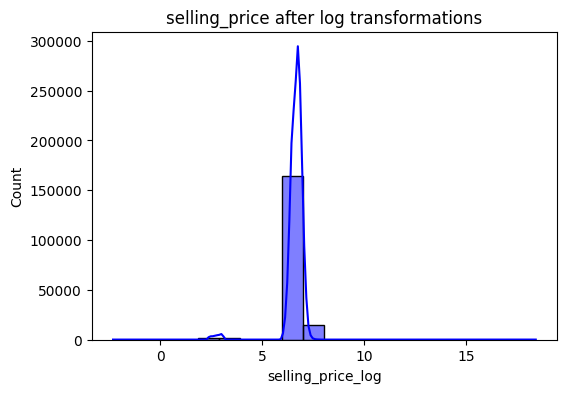

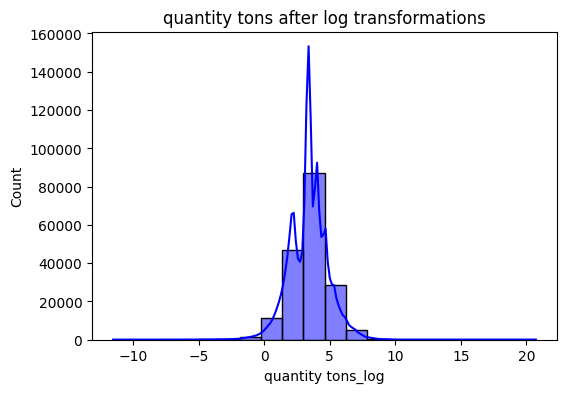

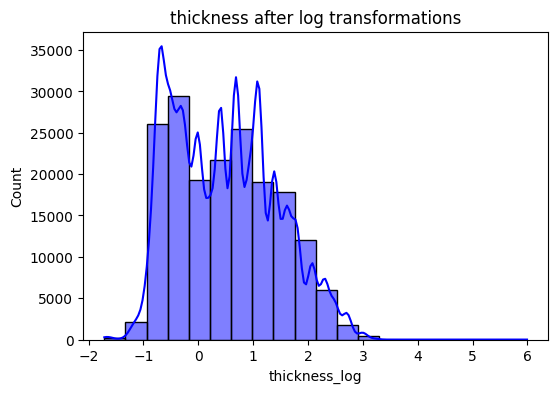

In [31]:
df['selling_price_log'] = np.log(df['selling_price'])
plt.figure(figsize=(6, 4))
sns.histplot(df['selling_price_log'], kde=True, color='blue', bins=20)
plt.title(f'selling_price after log transformations')
plt.show()

df['quantity tons_log'] = np.log(df['quantity tons'])
plt.figure(figsize=(6, 4))
sns.histplot(df['quantity tons_log'],kde=True, color='blue', bins=20)
plt.title(f'quantity tons after log transformations')
plt.show()

df['thickness_log'] = np.log(df['thickness'])
plt.figure(figsize=(6, 4))
sns.histplot(df['thickness_log'],kde=True, color='blue', bins=20)
plt.title(f'thickness after log transformations')
plt.show()

In [32]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 181620 non-null  object        
 1   item_date          181620 non-null  datetime64[ns]
 2   quantity tons      181620 non-null  float64       
 3   customer           181620 non-null  float64       
 4   country            181620 non-null  float64       
 5   status             181620 non-null  object        
 6   item type          181620 non-null  object        
 7   application        181620 non-null  float64       
 8   thickness          181620 non-null  float64       
 9   width              181620 non-null  float64       
 10  material_ref       181620 non-null  object        
 11  product_ref        181620 non-null  int64         
 12  delivery date      181620 non-null  datetime64[ns]
 13  selling_price      181620 non-null  float64      

#### correlation using HeatMap

<Axes: >

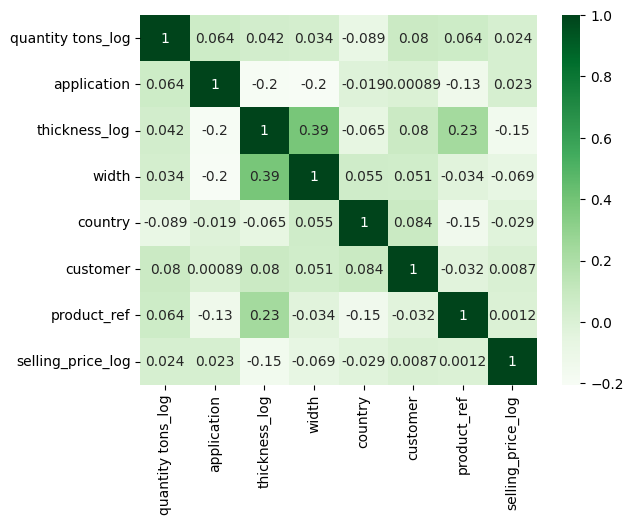

In [34]:
correlation = df[['quantity tons_log','application','thickness_log','width','country','customer','product_ref',
        'selling_price_log',]].corr()
sns.heatmap(correlation,annot=True,cmap="Greens")

In [24]:
# creating two copy for dataframe

df_c = df.copy()

df1 = df.copy()

#### One hot encoder

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

X=df_c[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_c['selling_price_log']

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot_item_type', OneHotEncoder(), ['item type']),
        ('onehot_status', OneHotEncoder(), ['status']),
        ('passthrough', 'passthrough', ['quantity tons_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref'])
    ])

# Apply the transformation
X = preprocessor.fit_transform(X)
print("Columns after selecting features X and target variable y:")
print(df_c.columns)
print("Columns after applying the ColumnTransformer:")
print(preprocessor.get_feature_names_out())


Columns after selecting features X and target variable y:
Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_log',
       'quantity tons_log', 'thickness_log'],
      dtype='object')
Columns after applying the ColumnTransformer:
['onehot_item_type__item type_IPL' 'onehot_item_type__item type_Others'
 'onehot_item_type__item type_PL' 'onehot_item_type__item type_S'
 'onehot_item_type__item type_SLAWR' 'onehot_item_type__item type_W'
 'onehot_item_type__item type_WI' 'onehot_status__status_Draft'
 'onehot_status__status_Lost' 'onehot_status__status_Not lost for AM'
 'onehot_status__status_Offerable' 'onehot_status__status_Offered'
 'onehot_status__status_Revised' 'onehot_status__status_To be approved'
 'onehot_status__status_Won' 'onehot_status__status_Wonderful'
 'passthrough__quantity tons_log' 'passthrough__application

#### Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Columns after scaling the features:")
print(df_c.columns)


Columns after scaling the features:
Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_log',
       'quantity tons_log', 'thickness_log'],
      dtype='object')


In [69]:
df_c.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_log',
       'quantity tons_log', 'thickness_log'],
      dtype='object')

#### Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dtr = DecisionTreeRegressor()

In [71]:
y_test

168710    6.838405
44568     6.964136
177714    6.265301
27672     6.949856
51796     6.304449
            ...   
18436     7.107131
36294     6.846943
106888    6.799056
72979     6.884487
179659    6.316804
Name: selling_price_log, Length: 18162, dtype: float64

#### hyperparameter tuning

In [75]:
# hyperparameters for decision tree
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}



#### grid search CV

In [76]:
# gridsearchcv for decision tree 

grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean squared error: 0.028543712729351772
R-squared: 0.9114019840473103


#### Defining the new data

In [77]:
# Define the new data as a list of lists
new_data = [[np.log(40),30,np.log(10),550,25,30153453,62837723,'PL','Won']]

# Define column names for the new data
columns = ['quantity tons_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref','item type','status']

# Create a DataFrame for the new data
new_df = pd.DataFrame(new_data, columns=columns)



#### get the predicted sellling price for new data

In [78]:
# Preprocess the new data
new_data_processed = preprocessor.transform(new_df)

# Scale the new data
new_data_scaled = scaler.transform(new_data_processed)

# Predict selling prices for the new data
predicted_log_prices = best_model.predict(new_data_scaled)

# Convert the predicted logarithmic prices back to original scale
predicted_prices = np.exp(predicted_log_prices)

print("Predicted selling price:", predicted_prices)


Predicted selling price: [559.89650303]


#### saving the model using pickle

In [79]:
import pickle

# Save the trained model to a file
with open('decision_tree_regressor_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [80]:
import pickle

# Load the saved model
with open('decision_tree_regressor_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open('scaler1.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('preprocessor1.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

# Use the loaded model to make predictions
#predicted_price = loaded_model.predict(new_df)


In [34]:
df1 = df_c[df_c['status'].isin(['Won', 'Lost'])]
len(df1)

150427

#### Decision Tree Classifier

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

X=df1[['quantity tons_log','item type','application','thickness_log','width','country','customer','product_ref','selling_price_log']]
y=df1['status']

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot_item_type', OneHotEncoder(), ['item type']),
        ('passthrough', 'passthrough', ['quantity tons_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref',
                                        'selling_price_log'])
    ])

# Apply the transformation
X = preprocessor.fit_transform(X)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.911686498703716
Confusion Matrix:
[[ 5673  1329]
 [ 1328 21756]]
Classification Report:
              precision    recall  f1-score   support

        Lost       0.81      0.81      0.81      7002
         Won       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



In [51]:
# Define the new data as a list of lists
new_data = [[np.log(400),'S',20,np.log(100),650,30,30153453,62837723,np.log(355)]]

# Define column names for the new data
columns = ['quantity tons_log','item type','application','thickness_log','width','country','customer','product_ref','selling_price_log']

# Create a DataFrame for the new data
new_df1 = pd.DataFrame(new_data, columns=columns)


In [52]:
# Apply the same preprocessing steps as done for training data
new_X = preprocessor.transform(new_df1)
new_X = scaler.transform(new_X)

# Predict the status for the new data
predicted_status = dtc.predict(new_X)

# Print the predicted status
print("Predicted Status:", predicted_status)

Predicted Status: ['Lost']


In [55]:
import pickle

# Save the trained model to a file
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dtc, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

# Load the trained model from the file
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
